### Title: Group 6
### Authors: Reshma Punukora, Avi Aggarwal, Jahnavi Galla
### Date: 12/2/2022

## Analysis of Purchasing Trend for Regork Customers in the Mid-Level Income Groups.
## Introduction.

### The Business Problem:
#### To identify and evaluate the purchasing trends of the 50-74k (mid-income) income demographics, which will allow us to offer the right discount coupons for the products that are commonly purchased.
#### This will also help us in strategically formulating campaigns and distribution of coupons to customers by studying the demographics in relation with the purchase pattern of most bought and bought-together products.

### How we addressed the problem?
#### We performed basic Exploratory Data Analysis on the "CompleteJourney Dataset" to identify which income-range generates the most sales.
#### We narrowed down on the middle income groups responsible for the most sales. We looked at the total sales by department, and identified the highest and lowest sales-generating departments.
#### We then analyzed some demographics within this income-range and performed Market Basket Analysis on the entire products data and created rules to help us identify the most frequently bought together products. 

### Our Analysis and Proposed Solution:
#### From our analysis, we observe that sales were primarily generated by the 50-74K income group followed by 35-49K and 75-99K income-ranges. This indicated that the population belonging to these three income groups were the ones making the most purchases from Regork.
#### We then zeroed in on the income range "50-74K" and did a department-wise analysis which showed that "Grocery" is the topmost revenue generating department for Regork, accounting for almost 50% of the total sales. We also identified the top-10 and bottom-10 departments (except Grocery) that were generating revenue.
#### Customer demographic analysis shows that the most active customers buying Groceries from Regork are aged between 45 and 54 who are homeowners and with no kids.
#### Using the rules identified from Market Basket Analysis, we can create the right product bundles and give appropriate discounts and coupons on the same.

In [17]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
from completejourney_py import get_data

In [18]:
cj_data = get_data()

transactions = cj_data['transactions']
products = cj_data['products']
coupons = cj_data['coupons']
campaigns = cj_data['campaigns']
demographics = cj_data['demographics']
campaign_descriptions = cj_data['campaign_descriptions']
coupon_redemptions = cj_data['coupon_redemptions']

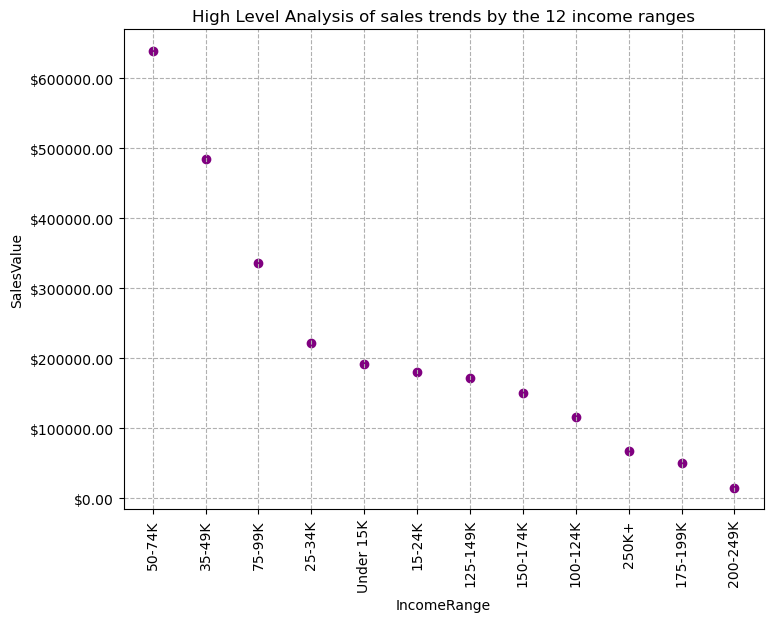

In [19]:
df1 = transactions.merge(products, how = 'inner', on = 'product_id')
df1 = df1.merge(demographics, how = 'inner', on = "household_id")
df_final1 = df1.groupby(['income'], as_index = False).agg({'sales_value' : sum}).sort_values(by = 'sales_value', ascending = False)
df_final1

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

income = df_final1['income']
sales_value = df_final1['sales_value']

ax.scatter(income, sales_value, color = 'purple')
ax.set_ylabel('SalesValue')
ax.set_xlabel('IncomeRange')
ax.set_title('High Level Analysis of sales trends by the 12 income ranges')
ax.yaxis.set_major_formatter('${x:1.2f}')
ax.grid(linestyle = 'dashed')
plt.xticks(rotation = 90)

plt.show() 

### Overall Sales trend per department for income range "50-74K"

#### Based on the above graph, we decided to dive deeper into this income range. We mapped the sales for the income group "50-74K" for each department to better understand their purchasing patterns. We identified that the "Grocery" department contributed towards more than 50% of the overall sales followed by the "Drug GM" department.

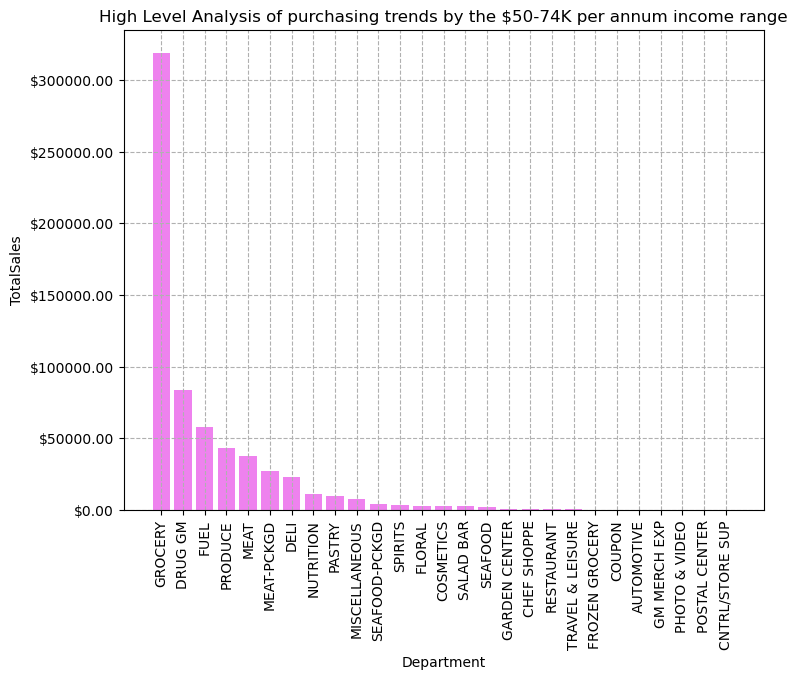

In [20]:
df2 = transactions.merge(products, how = 'inner', on = 'product_id')
df2 = df2.merge(demographics, how = 'inner', on = "household_id").query("income == '50-74K'")
df_final2 = df2.groupby(['department'], as_index = False).agg({'sales_value' : sum}).sort_values(by = 'sales_value', ascending = False)
df_final2

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

department = df_final2['department']
sales_value = df_final2['sales_value']


ax.bar(department, sales_value, color = 'Violet')
ax.set_ylabel('TotalSales')
ax.set_xlabel('Department')
ax.set_title('High Level Analysis of purchasing trends by the $50-74K per annum income range')
ax.yaxis.set_major_formatter('${x:1.2f}')
ax.grid(linestyle = 'dashed')
plt.xticks(rotation = 90)
plt.show() 

### Intermediate Level Analysis of Departments

### Overall Sales Analysis for top-10 and bottom-10 departments (except Grocery)

#### After studying the above plot, we realized that due to the high sales under the Grocery department, the scale was getting skewed and we weren't able to properly observe the sales trend for the lowest revenue-generating 11 departments. To better accommodate this, we have broken down the graph into the below 2 plots to individually study the top-10 and bottom-10 departments (excluding Grocery). 

In [21]:
df3 = transactions.merge(products, how = 'inner', on = 'product_id')
df3 = df3.merge(demographics, how = 'inner', on = "household_id").query("income == '50-74K'")
df3 = df3.query("department != 'GROCERY'")
df_final3 = df3.groupby(['department'], as_index = False).agg({'sales_value' : sum}).sort_values(by = 'sales_value', ascending = False)
df_final3 = df_final3.head(15)
df_final3

department  sales_value
6         DRUG GM     83353.15
9            FUEL     57874.74
19        PRODUCE     43410.30
12           MEAT     37764.83
13     MEAT-PCKGD     27316.63
5            DELI     23174.38
15      NUTRITION     11279.97
16         PASTRY      9246.25
14  MISCELLANEOUS      7500.38
23  SEAFOOD-PCKGD      4061.07
24        SPIRITS      3005.06
7          FLORAL      2873.53
3       COSMETICS      2820.12
21      SALAD BAR      2364.61
22        SEAFOOD      2128.69

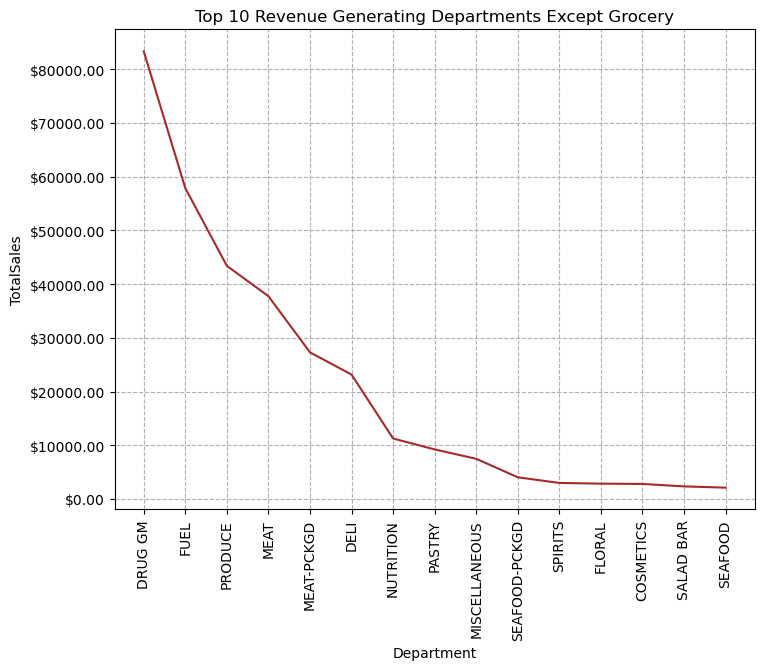

In [22]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

department = df_final3['department']
sales_value = df_final3['sales_value']


ax.plot(department, sales_value, color = 'brown')
ax.set_ylabel('TotalSales')
ax.set_xlabel('Department')
ax.set_title('Top 10 Revenue Generating Departments Except Grocery')
ax.yaxis.set_major_formatter('${x:1.2f}')
ax.grid(linestyle = 'dashed')
plt.xticks(rotation = 90)
plt.show()

In [23]:
df4 = transactions.merge(products, how = 'inner', on = 'product_id')
df4 = df4.merge(demographics, how = 'inner', on = "household_id").query("income == '50-74K'")
df4 = df4.query("department != 'GROCERY'")
df_final4 = df4.groupby(['department'], as_index = False).agg({'sales_value' : sum}).sort_values(by = 'sales_value', ascending = False)
df_final4 = df_final4.tail(15)
df_final4

department  sales_value
7             FLORAL      2873.53
3          COSMETICS      2820.12
21         SALAD BAR      2364.61
22           SEAFOOD      2128.69
10     GARDEN CENTER       737.35
1        CHEF SHOPPE       253.66
20        RESTAURANT       196.03
25  TRAVEL & LEISURE       192.40
8     FROZEN GROCERY       108.62
4             COUPON        95.86
0         AUTOMOTIVE        26.32
11      GM MERCH EXP         6.94
17     PHOTO & VIDEO         4.11
18     POSTAL CENTER         2.49
2    CNTRL/STORE SUP         0.00

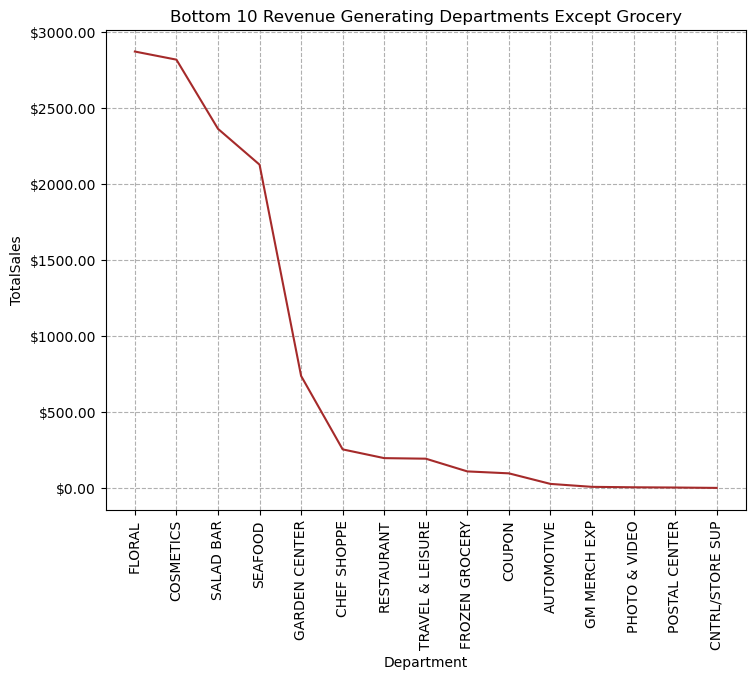

In [24]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

department = df_final4['department']
sales_value = df_final4['sales_value']


ax.plot(department, sales_value, color = 'brown')
ax.set_ylabel('TotalSales')
ax.set_xlabel('Department')
ax.set_title('Bottom 10 Revenue Generating Departments Except Grocery')
ax.yaxis.set_major_formatter('${x:1.2f}')
ax.grid(linestyle = 'dashed')
plt.xticks(rotation = 90)
plt.show()

### In-Depth Customer Demographic Analysis

#### To dive deeper into the $50-74K income range and uncover insights on the purchases made by them, we plotted the below graph to identify specific demographic based on their age, homeowner status, and count of kids.

In [25]:
df5 = transactions.merge(products, how = 'inner', on = 'product_id')
df5 = df5.query("department == 'GROCERY'")
df5 = df5.groupby(['household_id'], as_index = False).agg({'basket_id' : "nunique", 'sales_value': sum}).sort_values(by = 'sales_value', ascending = False)
df5 = df5.merge(demographics, how = 'inner', on = 'household_id').query("home_ownership != 'NA'")
df5 = df5.query("income == '50-74K'")
df5 = df5.groupby(['age', 'home_ownership', 'kids_count'], as_index = False).agg({'basket_id' : "nunique", 'sales_value': sum}).sort_values(by = 'sales_value', ascending = False)
df5

age      home_ownership kids_count  basket_id  sales_value
18  45-54           Homeowner          0         36     73428.97
10  35-44           Homeowner          0         16     32645.78
3   25-34           Homeowner          0         11     27066.83
26    65+           Homeowner          0          6     12074.01
20  45-54           Homeowner          2          6     11235.09
19  45-54           Homeowner          1          6      8359.51
23  55-64           Homeowner          0          4      8356.32
5   25-34           Homeowner          2          3      7659.39
13  35-44           Homeowner         3+          4      7656.76
12  35-44           Homeowner          2          3      6871.04
11  35-44           Homeowner          1          4      5620.77
0   19-24           Homeowner          0          2      4039.92
4   25-34           Homeowner          1          3      3942.22
6   25-34           Homeowner         3+          4      3913.08
24  55-64           Homeowner          1          3      3603.67
21  45-54           Homeowner         3+          2      2826.29
1   19-24           Homeowner          1          1      2585.85
16  35-44              Renter          1          1      2095.53
14  35-44  Probable Homeowner          0          1      1851.45
9   25-34              Renter          0          1      1791.43
17  35-44              Renter          2          1      1747.89
2   19-24  Probable Homeowner          0          1      1545.59
25  55-64           Homeowner         3+          1      1296.03
22  45-54              Renter          0          1      1210.09
15  35-44  Probable Homeowner          2          1      1183.29
28    65+     Probable Renter          1          1      1084.23
7   25-34  Probable Homeowner          1          1      1083.70
27    65+           Homeowner          1          1       931.69
8   25-34     Probable Renter          0          1       735.23

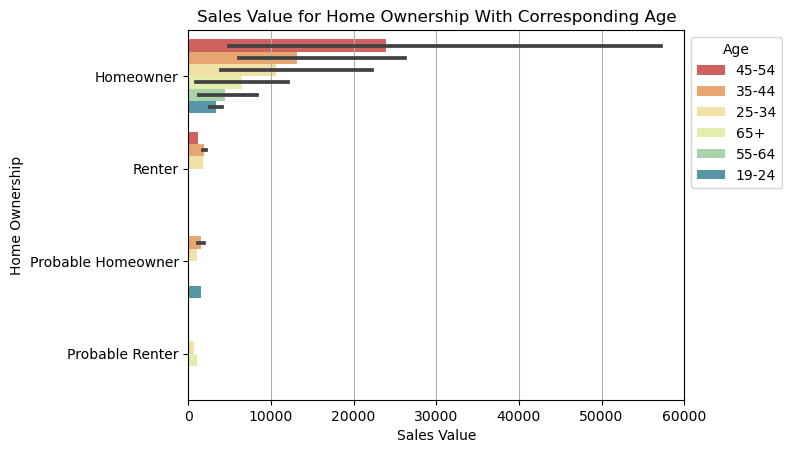

In [26]:
plot2 = sns.barplot(data = df5, x = 'sales_value', y = 'home_ownership', hue = 'age', orient = 'h')
plot2.set(xlabel = 'Sales Value', ylabel = 'Home Ownership', title = 'Sales Value for Home Ownership With Corresponding Age')
plot2.legend(title = 'Age', bbox_to_anchor=(1, 1), loc = 'upper left')
plot2.grid(axis = 'x')

### Exploratory Data Analysis Part 2

### In-Depth Market Basket Analysis

#### To dive even deeper into the $50-74K income group making Grocery purchases, belonging to age-group as 45-54, homeowners with 0 kids, and uncover their purchasing trends we have individually identified the top 20 most frequently bought items by married and unmarried people fitting this demographic group by using market basket analysis.

In [27]:
df6 = transactions.merge(demographics, how = 'inner', on = 'household_id')
df6 = df6.merge(products, how = 'inner', on = 'product_id')
df6 = df6.query("income == '50-74K'")
df6 = df6.query("kids_count == '0'")
df6 = df6.query("home_ownership == 'Homeowner'")
df6 = df6.query("age == '45-54'")
df6 = df6.query("household_size == '1'")
df6 = df6.query("sales_value != '0.00'")
df6

household_id  store_id    basket_id  product_id  quantity  \
68              2341       335  34141765421     1095275         3   
109             1595       384  32074827317     1095275         4   
110             1595       384  32760626128     1095275         8   
160              771       359  35386657523     1095275         1   
161              771       359  35486310496     1095275         1   
...              ...       ...          ...         ...       ...   
825240          1001      3131  41429516853    10287852         1   
825241          1001      3131  41429516853    12785200         1   
825242          1001      3131  41429516853    15781342         1   
825243          1001      3131  41429516853    15978400         1   
825244          1001      3131  41429516853    16772915         1   

        sales_value  retail_disc  coupon_disc  coupon_match_disc  week  ...  \
68             1.50         0.00          0.0                0.0    30  ...   
109            2.00         0.00          0.0                0.0    10  ...   
110            4.00         0.00          0.0                0.0    16  ...   
160            0.50         0.00          0.0                0.0    35  ...   
161            0.50         0.00          0.0                0.0    35  ...   
...             ...          ...          ...                ...   ...  ...   
825240         1.60         0.00          0.0                0.0    53  ...   
825241         3.49         0.00          0.0                0.0    53  ...   
825242         1.50         0.99          0.0                0.0    53  ...   
825243         1.00         0.00          0.0                0.0    53  ...   
825244         1.50         1.99          0.0                0.0    53  ...   

       marital_status household_size   household_comp kids_count  \
68          Unmarried              1  1 Adult No Kids          0   
109         Unmarried              1  1 Adult No Kids          0   
110         Unmarried              1  1 Adult No Kids          0   
160         Unmarried              1  1 Adult No Kids          0   
161         Unmarried              1  1 Adult No Kids          0   
...               ...            ...              ...        ...   
825240      Unmarried              1  1 Adult No Kids          0   
825241      Unmarried              1  1 Adult No Kids          0   
825242      Unmarried              1  1 Adult No Kids          0   
825243      Unmarried              1  1 Adult No Kids          0   
825244      Unmarried              1  1 Adult No Kids          0   

       manufacturer_id department     brand                product_category  \
68                   2     PASTRY  National                           ROLLS   
109                  2     PASTRY  National                           ROLLS   
110                  2     PASTRY  National                           ROLLS   
160                  2     PASTRY  National                           ROLLS   
161                  2     PASTRY  National                           ROLLS   
...                ...        ...       ...                             ...   
825240             794    GROCERY  National  CONVENIENT BRKFST/WHLSM SNACKS   
825241             544    GROCERY  National                      BAG SNACKS   
825242             544    GROCERY  National                      BAG SNACKS   
825243            5569    GROCERY  National          FRZN MEAT/MEAT DINNERS   
825244            1694    DRUG GM  National              PLASTIC HOUSEWARES   

                          product_type package_size  
68                       ROLLS: BAGELS         4 OZ  
109                      ROLLS: BAGELS         4 OZ  
110                      ROLLS: BAGELS         4 OZ  
160                      ROLLS: BAGELS         4 OZ  
161                      ROLLS: BAGELS         4 OZ  
...                                ...          ...  
825240                TOASTER PASTRIES      14.1 OZ  
825241                 MISC BAG 

In [28]:
df7 = df6[['basket_id', 'product_type']]

mba_unmarried = df7.merge(df7, how = 'inner', on = 'basket_id')
mba_unmarried = mba_unmarried.query('product_type_x != product_type_y')
mba_unmarried = mba_unmarried.groupby(['product_type_x','product_type_y'], as_index = False)
mba_unmarried = mba_unmarried.count()
mba_unmarried = mba_unmarried.sort_values('basket_id', ascending = False)

mba_unmarried_final = mba_unmarried[0:20]
mba_unmarried_final

product_type_x                  product_type_y  \
48037   FRZN BREAKFAST ENTREES/SANDWIC  FRZN SS PREMIUM ENTREES/DNRS/T   
50239   FRZN SS PREMIUM ENTREES/DNRS/T  FRZN BREAKFAST ENTREES/SANDWIC   
43947            FLUID MILK WHITE ONLY          YOGURT NOT MULTI-PACKS   
138286          YOGURT NOT MULTI-PACKS           FLUID MILK WHITE ONLY   
50104   FRZN SS PREMIUM ENTREES/DNRS/N          YOGURT NOT MULTI-PACKS   
138309          YOGURT NOT MULTI-PACKS  FRZN SS PREMIUM ENTREES/DNRS/N   
43158            FLUID MILK WHITE ONLY                         BANANAS   
7545                           BANANAS           FLUID MILK WHITE ONLY   
138149          YOGURT NOT MULTI-PACKS                         BANANAS   
8075                           BANANAS          YOGURT NOT MULTI-PACKS   
118027  SOFT DRINKS 12/18&15PK CAN CAR           FLUID MILK WHITE ONLY   
43834            FLUID MILK WHITE ONLY  SOFT DRINKS 12/18&15PK CAN CAR   
77934   NATURAL CHEESE EXACT WT CHUNKS  SOFT DRINKS 12/18&15PK CAN CAR   
118196  SOFT DRINKS 12/18&15PK CAN CAR  NATURAL CHEESE EXACT WT CHUNKS   
32870   DAIRY CASE 100% PURE JUICE - O           FLUID MILK WHITE ONLY   
43316            FLUID MILK WHITE ONLY  DAIRY CASE 100% PURE JUICE - O   
117843  SOFT DRINKS 12/18&15PK CAN CAR                         BANANAS   
7964                           BANANAS  SOFT DRINKS 12/18&15PK CAN CAR   
33343   DAIRY CASE 100% PURE JUICE - O          YOGURT NOT MULTI-PACKS   
138248          YOGURT NOT MULTI-PACKS  DAIRY CASE 100% PURE JUICE - O   

        basket_id  
48037         324  
50239         324  
43947         247  
138286        247  
50104         190  
138309        190  
43158         188  
7545          188  
138149        177  
8075          177  
118027        164  
43834         164  
77934         158  
118196        158  
32870         138  
43316         138  
117843        131  
7964          131  
33343         123  
138248        123

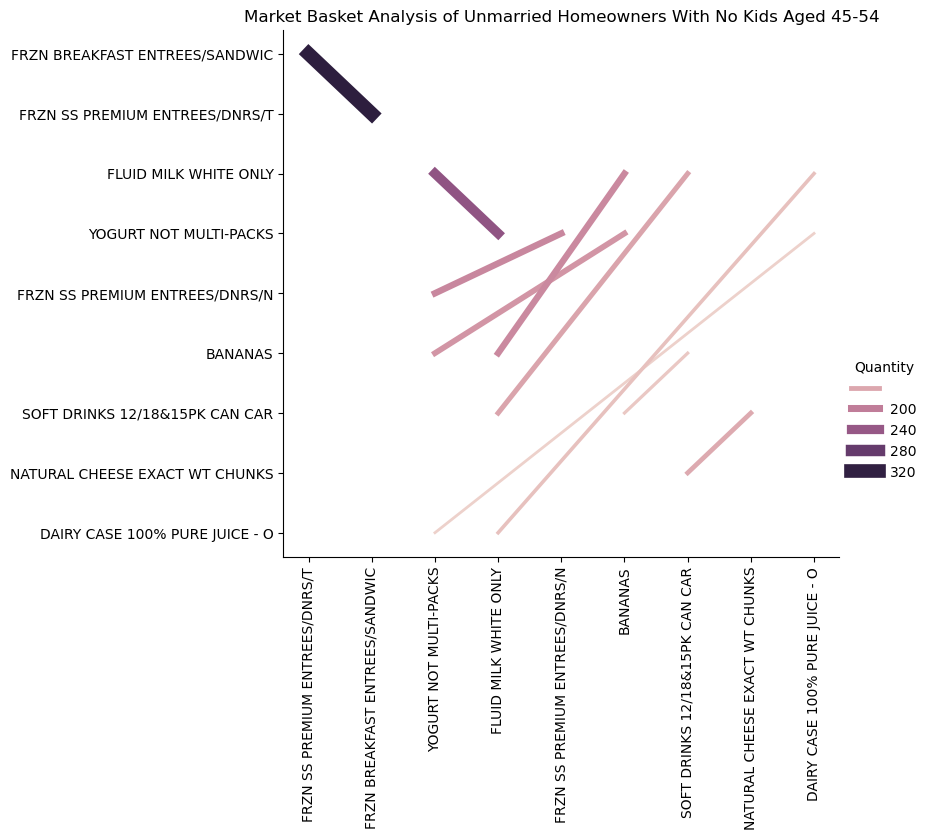

In [29]:
sns.set_palette(palette = "Spectral", n_colors = None, desat = None, color_codes = True)
plot = sns.relplot(data = mba_unmarried_final, x = "product_type_y", y = "product_type_x", hue = 'basket_id', size = 'basket_id', kind = "line", aspect = 1.5, height = 6, sizes = (2, 10)).set_xticklabels(rotation = 90).set_axis_labels('', '')
plot._legend.texts[0].set_text("")
plot._legend.set_title('Quantity')
plot.set(title = 'Market Basket Analysis of Unmarried Homeowners With No Kids Aged 45-54');

In [30]:
df8 = transactions.merge(demographics, how = 'inner', on = 'household_id')
df8 = df8.merge(products, how = 'inner', on = 'product_id')
df8 = df8.query("income == '50-74K'")
df8 = df8.query("kids_count == '0'")
df8 = df8.query("home_ownership == 'Homeowner'")
df8 = df8.query("age == '45-54'")
df8 = df8.query("household_size == '2'")
df8 = df8.query("sales_value != '0.00'")
df8

household_id  store_id    basket_id  product_id  quantity  \
173             1509       429  31242547057     1095275         2   
174             1509       429  31355982106     1095275         2   
175             1509       362  31540761398     1095275         3   
176             1509       429  31623627344     1095275         2   
177             1509       429  31699252341     1095275         3   
...              ...       ...          ...         ...       ...   
825071          2094       333  33433190292    13381286         1   
825072          2094       333  33957173155     6979060         1   
825074          2094       333  40618663240      900218         1   
825075          2094       333  41352106093    15717291         1   
825076          2094       333  41453283359     1002026         1   

        sales_value  retail_disc  coupon_disc  coupon_match_disc  week  ...  \
173            1.00          0.0          0.0                0.0     2  ...   
174            1.00          0.0          0.0                0.0     3  ...   
175            1.50          0.0          0.0                0.0     4  ...   
176            1.00          0.0          0.0                0.0     5  ...   
177            1.50          0.0          0.0                0.0     6  ...   
...             ...          ...          ...                ...   ...  ...   
825071         3.99          0.0          0.0                0.0    23  ...   
825072         5.44          0.0          0.0                0.0    28  ...   
825074         2.99          0.0          0.0                0.0    45  ...   
825075         0.89          0.1          0.0                0.0    52  ...   
825076         3.59          0.0          0.0                0.0    53  ...   

       marital_status household_size    household_comp kids_count  \
173           Married              2  2 Adults No Kids          0   
174           Married              2  2 Adults No Kids          0   
175           Married              2  2 Adults No Kids          0   
176           Married              2  2 Adults No Kids          0   
177           Married              2  2 Adults No Kids          0   
...               ...            ...               ...        ...   
825071        Married              2  2 Adults No Kids          0   
825072        Married              2  2 Adults No Kids          0   
825074        Married              2  2 Adults No Kids          0   
825075        Married              2  2 Adults No Kids          0   
825076        Married              2  2 Adults No Kids          0   

       manufacturer_id department     brand product_category  \
173                  2     PASTRY  National            ROLLS   
174                  2     PASTRY  National            ROLLS   
175                  2     PASTRY  National            ROLLS   
176                  2     PASTRY  National            ROLLS   
177                  2     PASTRY  National            ROLLS   
...                ...        ...       ...              ...   
825071            5423       MEAT  National     SMOKED MEATS   
825072            4697       MEAT  National             BEEF   
825074            1291  NUTRITION  National             SOUP   
825075             112    GROCERY  National         CAT FOOD   
825076            1781    GROCERY  National         HISPANIC   

                          product_type package_size  
173                      ROLLS: BAGELS         4 OZ  
174                      ROLLS: BAGELS         4 OZ  
175                      ROLLS: BAGELS         4 OZ  
176                      ROLLS: BAGELS         4 OZ  
177                      ROLLS: BAGELS         4 OZ  
...                                ...          ...  
825071           SMOKED CHOPS BONELESS      11.5 OZ  
825072                   SEASONED BEEF         None  
825074                        ASCEPTIC        32 OZ  
825075  CAN CATFD GOURMET/SUP PREM (GR       5.5 OZ  
825076                   ITALIAN FOODS

In [31]:
df9 = df8[['basket_id', 'product_type']]

mba_married = df9.merge(df9, how = 'inner', on = 'basket_id')
mba_married = mba_married.query('product_type_x != product_type_y')
mba_married = mba_married.groupby(['product_type_x','product_type_y'], as_index = False)
mba_married = mba_married.count()
mba_married = mba_married.sort_values('basket_id', ascending = False)

mba_married_final = mba_married[0:20]
mba_married_final

product_type_x                  product_type_y  \
68581            FLUID MILK WHITE ONLY          YOGURT NOT MULTI-PACKS   
218015          YOGURT NOT MULTI-PACKS           FLUID MILK WHITE ONLY   
12371                          BANANAS           FLUID MILK WHITE ONLY   
67581            FLUID MILK WHITE ONLY                         BANANAS   
217838          YOGURT NOT MULTI-PACKS                         BANANAS   
13016                          BANANAS          YOGURT NOT MULTI-PACKS   
68412            FLUID MILK WHITE ONLY                 SHREDDED CHEESE   
182065                 SHREDDED CHEESE           FLUID MILK WHITE ONLY   
67905            FLUID MILK WHITE ONLY  FRZN SS PREMIUM ENTREES/DNRS/N   
80056   FRZN SS PREMIUM ENTREES/DNRS/N           FLUID MILK WHITE ONLY   
28068   CANNED CAT FOOD (9 LIVES/FRISK          FRZN MEAT ALTERNATIVES   
78772           FRZN MEAT ALTERNATIVES  CANNED CAT FOOD (9 LIVES/FRISK   
67881            FLUID MILK WHITE ONLY  FRZN BAGGED VEGETABLES - PLAIN   
73593   FRZN BAGGED VEGETABLES - PLAIN           FLUID MILK WHITE ONLY   
68261            FLUID MILK WHITE ONLY                         PREMIUM   
152422                         PREMIUM           FLUID MILK WHITE ONLY   
28071   CANNED CAT FOOD (9 LIVES/FRISK  FRZN SS PREMIUM ENTREES/DNRS/N   
79947   FRZN SS PREMIUM ENTREES/DNRS/N  CANNED CAT FOOD (9 LIVES/FRISK   
51567   DAIRY CASE 100% PURE JUICE - O           FLUID MILK WHITE ONLY   
182626                 SHREDDED CHEESE          YOGURT NOT MULTI-PACKS   

        basket_id  
68581         316  
218015        316  
12371         255  
67581         255  
217838        246  
13016         246  
68412         206  
182065        206  
67905         192  
80056         192  
28068         184  
78772         184  
67881         173  
73593         173  
68261         171  
152422        171  
28071         170  
79947         170  
51567         168  
182626        168

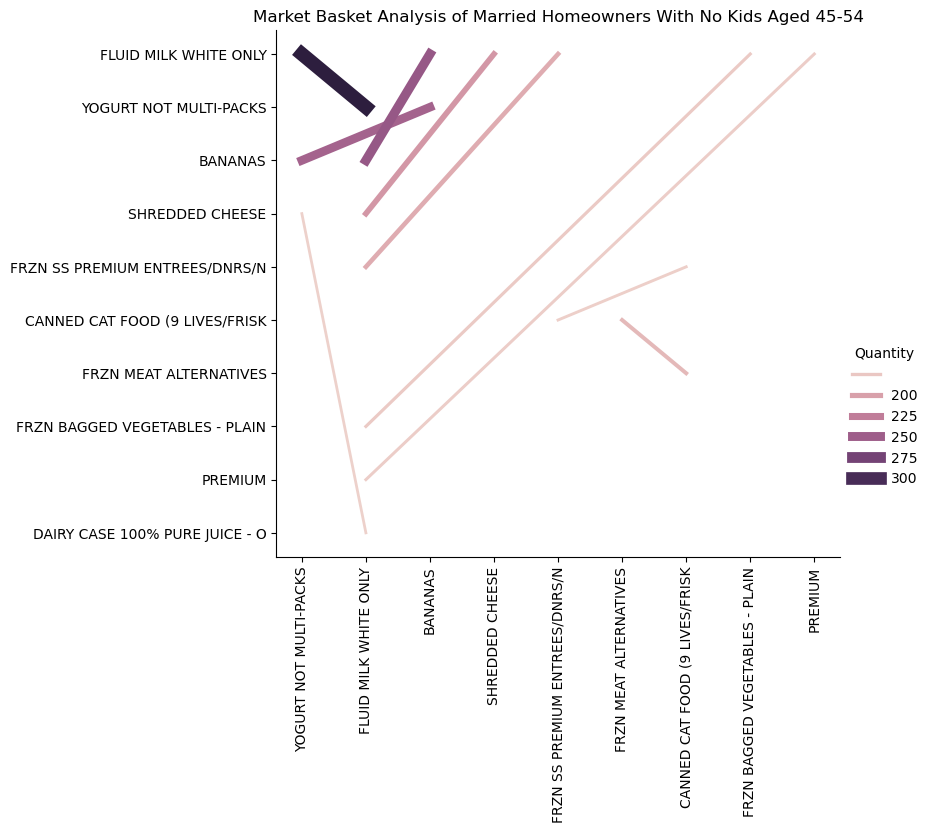

In [33]:
sns.set_palette(palette = "Spectral", n_colors = None, desat = None, color_codes = True)
plot = sns.relplot(data = mba_married_final, x = "product_type_y", y = "product_type_x", hue = 'basket_id', size = 'basket_id', kind = "line", aspect = 1.5, height = 6, sizes = (2, 10)).set_xticklabels(rotation = 90).set_axis_labels('', '')
plot._legend.texts[0].set_text("")
plot._legend.set_title('Quantity')
plot.set(title = 'Market Basket Analysis of Married Homeowners With No Kids Aged 45-54');

## Summary

### Problem Statement
#### Our problem statement is to identify trends in the purchasing of products by people belonging to $50-74K income group, specifically in Grocery department, to help Regork make better data-driven decisions for this target group.

### Problem Addressal
#### * We have used the completejourney dataset which includes the transactions, the demographics and the products data.
#### * We have employed plots and data visualization libraries to depict interesting results that will help Regork enhance their sales by streamlining their marketing and campaigning strategy with effective use of coupons, discounts, and combo offers.

### Interesting Insights
#### * We see from our analysis that sales were primarily generated by the "50-74K" income group followed by the income groups "35-49K" and "75-99K". This indicated that the people from these three income groups were the ones who were making the most purchases from Regork.
#### * We identified that Grocery sales are the ones driving the maximum sales within the 50-74K income groups and generating the most revenue. We also identified some of the under-performing departments such as Postal Center and Photo & Video.
#### * We then identified that people aged between 45-54, who own homes and have no kids are the ones driving the majority of these sales.
#### * Using the trends identified via Market Basket Analysis, we noted that breakfast items such as Sandwiches, Yogurt, Entrees etc. are the most frequently bought items.

### Our Proposal
#### We propose the following points to help increase Regork's profits:
#### * Increased marketing directed towards mid-level income groups can help boost sales.
#### * Some of the under-performing departments such as Postal Center, Photo & Video etc. can be benefited with better targeted promotions and coupon offerings.
#### * Increased offers such as combos, discounts etc. on frequently bought breakfast items can help increase sales and profits.

### Limitations
#### * Data quality issues - Some of the data that we wanted to use such as marital status had 'NA' data within it. A dataset without such 'NA' data would've led to much more accurate insights and led to the discovery of more interesting facts.
#### * Coupon & Demographic link - It would have been easier if there was a direct relation between coupon and demographics. This is one area we can explore further to identify which income groups redeemed most coupons.
#### * Location data in demographics - Having the location data of the demographics we tested upon would've been nice to help uncover the purchasing trend location-wise. Once we have that data, we can build on top of this report to better target customers based on their location.

